# 模型结果展示

# 引入库

In [146]:
import infer, infer_lstm, infer_linear, infer_lstm_v2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy

In [147]:
def get_min_ade_fde(metrics, key='ade'):
    min_ade = 100000
    for i in range(len(metrics[key])):
        if metrics[key][i] < min_ade:
            min_ade = metrics['ade'][i]
            min_fde = metrics['fde'][i]

    return min_ade, min_fde

In [148]:
# const
color_list = ['y', 'c', 'm', 'k', 'b']
marker_list = ['x', '+', '1', '|', 'v']

lat_min, lat_field, long_min, long_field, alt_min, alt_field = 3.1933607061071148,50.80410785495143,78.42022293891259,56.574887353137626,10599.32828794153,33135.2479876838

china_with_normal_parm = {
    'lat_min': 3.1933607061071148,
    'lat_field': 56.80018735854687,
    'long_min': 70.1073857229127,
    'long_field': 69.8803146893142,
    'alt_min': 0.0,
    'alt_field': 124400.0
}

asia2_param = {
    'lat_min': 31.76517870603203,
    'lat_field': 30.6685328612335,
    'long_min': 0.0011910893405788006,
    'long_field': 92.92122684765502,
    'alt_min':  -148.43954285828946,
    'alt_field': 45148.43954285829
}

asia3_param = {
    'lat_min': 30.395783270172892,
    'lat_field': 31.74846699181365,
    'long_min': 0.0011910893405788006,
    'long_field': 92.97109229168149,
    'alt_min':  -244.67804793347213,
    'alt_field': 45269.67804793347
}

In [149]:
# lat_min, lat_field, long_min, long_field, alt_min, alt_field = 3.1933607061071148,50.80615587860828,78.42022293891259,56.574887353137626,0.0,43734.576275625324
def process_normal(traj_data, normal_parm):
    traj_data[:, :, 0] = traj_data[:, : ,0] * normal_parm['lat_field'] + normal_parm['lat_min']

    traj_data[:, :, 1] = traj_data[:, : ,1] * normal_parm['long_field'] + normal_parm['long_min']
   
    traj_data[:, :, 2] = traj_data[:, : , 2] * normal_parm['alt_field'] + normal_parm['alt_min']
    
    return traj_data

def show_t(obs_traj, pred_traj_gt, predictions):
    obs_traj = process_normal(obs_traj, asia3_param)
    pred_traj_gt = process_normal(pred_traj_gt, asia3_param)
    
    for i in range(len(predictions)):
        predictions[i][0] = process_normal(predictions[i][0], asia3_param)
        predictions[i][0] = numpy.concatenate((numpy.expand_dims(obs_traj[-1, :, :], axis=0), predictions[i][0]), axis=0)
        
    pred_traj_gt = numpy.concatenate((numpy.expand_dims(obs_traj[-1, :, :], axis=0), pred_traj_gt), axis=0)
   
    fig = plt.figure()
    ax = Axes3D(fig)
    line_width = 1
    marker_size = 3
    
    ax.plot(obs_traj[:, 0, 0], obs_traj[:, 0, 1], obs_traj[:, 0, 2], color='r', label='input', linewidth=line_width)
    ax.plot(pred_traj_gt[:, 0, 0], pred_traj_gt[:, 0, 1], pred_traj_gt[:, 0, 2], color='g', label='groudtruth', linewidth=line_width, marker='D', markersize=marker_size)

    result_text = ''
    for i in range(len(predictions)):
        (prediction, ade, fde, label) = predictions[i]
        # print('%s len is %d' % (label, len(prediction)))
        ax.plot(prediction[:, 0, 0], prediction[:, 0, 1], prediction[:, 0, 2], color=color_list[i], label=label, linewidth=line_width, marker=marker_list[i], markersize=marker_size)
        result_text = result_text + '%s ade  = %f    %s fde = %f\n' % (label, ade, label, fde)

    plt.title(result_text, y=-0.2)

    ax.legend()
    plt.show()
    # plt.legend()


In [150]:
# fig = plt.figure(figsize=(20, 4.2))
# title = ['(a)', '(b)', '(c)', '(d)']
# 
# for i in range(4):
#     obs_traj, pred_traj_fake, pred_traj_gt = infer1.infer()
#     ax = fig.add_subplot(1, 4, i + 1, projection='3d')
#     show_t(obs_traj, pred_traj_fake, pred_traj_gt, ax)
#     plt.title(title[i], y=-0.2)
# 
# plt.show()

# 不同模型在china_with_normal上比较
## 1. 载入模型

In [151]:
# china_with_normal_tGAN_4模型
china_with_normal_tGAN_4_infer = infer.Infer(use_cuda=1)
china_with_normal_tGAN_4_infer.load_model('models/asia4_tgan_2_with_model.pt')

## 2. 查看各个模型的指标

In [142]:
metrics = china_with_normal_tGAN_4_infer.check_accuracy('test', limit=True)
print('china_with_normal_tGAN_4 test ade is %f' % metrics['ade'])
print('china_with_normal_tGAN_4 test fde is %f' % metrics['fde'])

torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([5, 32])
torch.Size([1, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([6, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([5, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([1, 32])


torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([5, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([2, 32])


torch.Size([1, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([5, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([3, 32])
torch.Size([2, 32])
torch.Size([3, 32])
torch.Size([3, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([5, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([4, 32])
torch.Size([2, 32])
torch.Size([2, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([4, 32])
torch.Size([1, 32])
torch.Size([2, 32])
torch.Size([1, 32])
china_with_normal_tGAN_4 test ade is 0.046527
china_with_normal_tGAN_4 test fde is 0.067501


## 3. 实际效果的测试

In [152]:
# 获取一条数据
obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end = china_with_normal_tGAN_4_infer.get_one_data()

In [153]:
predictions = []

tgan3_pred, tgan3_ade, tgan3_fde = china_with_normal_tGAN_4_infer.predict(obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end)
predictions.append([tgan3_pred, tgan3_ade, tgan3_fde, 'china_with_normal_tGAN_4'])

torch.Size([1, 32])


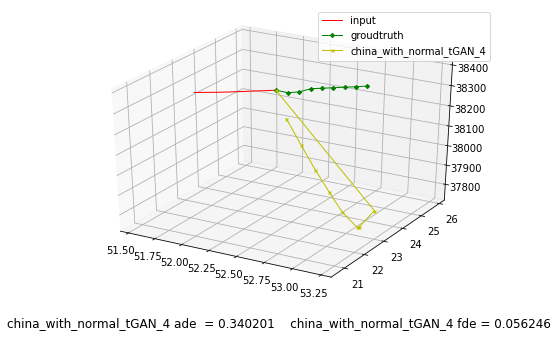

In [154]:
obs_traj = obs_traj.cpu().detach().numpy()
pred_traj_gt = pred_traj_gt.cpu().detach().numpy()

show_t(obs_traj, pred_traj_gt, predictions)